## Iterating on indices and items

In [1]:
# Iterating over the items.
data = ['a', 'b', 'c']
for x in data:
    print(x)

a
b
c


In [2]:
# Iterating over the indices.
for i in range(len(data)):
    print(i)

0
1
2


In [3]:
# Iterating over the indices and items (conventional solution).
for i in range(len(data)):
    print(i, data[i])

0 a
1 b
2 c


In [4]:
# Iterating over the indices and items (Pythonic solution).
for i, x in enumerate(data):
    print(i, x)

0 a
1 b
2 c


In [5]:
type(enumerate(data))

enumerate

In [6]:
list(enumerate(data))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [9]:
# Using enumerate to generate line indices for a text file.
for i, line in enumerate(open('example_file.txt')):
    print(i, line.strip())

0 10,12,20,32
1 11,13,21,33


## Iterating over multiple sequences in parallel

In [10]:
# Conventional solution:
words = ['foo', 'bar', 'apple']
numbers = [10,20,30]

for i in range (len(words)):
    print (words[i], numbers[i])

foo 10
bar 20
apple 30


In [12]:
# Pythonic solution, using zip:
for w,n in zip(words, numbers):
    print(w,n)

foo 10
bar 20
apple 30


In [13]:
# Length of the result will be the length of the shortest input.
words = ['foo', 'bar', 'apple']
numbers = [10,20,30,40]

for w,n in zip(words, numbers):
    print(w,n)

foo 10
bar 20
apple 30


In [14]:
type(zip(words, numbers))

zip

In [15]:
list(zip(words, numbers))

[('foo', 10), ('bar', 20), ('apple', 30)]

In [16]:
# Combining enumerate and zip.
for i, (w,n) in enumerate(zip(words, numbers)):
    print(i,w,n)

0 foo 10
1 bar 20
2 apple 30


In [17]:
# ...the same using index based looping:
for i in range (len(numbers)):
    print (i,words[i], numbers[i])

0 foo 10
1 bar 20
2 apple 30


IndexError: list index out of range

In [18]:
for i in range (len(words)):
    print (i,words[i], numbers[i])

0 foo 10
1 bar 20
2 apple 30


### Longest Collatz Sequence (Problem 14)

The following iterative sequence is defined for the set of positive integers:
- $n \rightarrow n / 2$ (if $n$ is even)
- $n \rightarrow 3n + 1$ (if $n$ is odd)


Using the rule above and starting with 13, we generate the following sequence: 13, 40, 20, 10, 5, 16, 8, 4, 2, 1. It can be seen that this sequence (starting at 13 and finishing at 1) contains 10 terms. Although it has not been proved yet (Collatz Problem), it is thought that all starting numbers finish at 1.

Which starting number, under one million, produces the longest chain?

NOTE: Once the chain starts the terms are allowed to go above one million.

In [35]:
def steps(x):
    if x%2==0: return x//2
    else: return 3*x+1

def check(x, st):
    if x in A: return (1, st+A[x])
    else: return (steps(x), st+1)


In [56]:
%%time
A = {1:1, 2:2}
up_lim=1000000

for i in range(3,up_lim):
    st=1
    x=i
    while x!=1:
        x,st = check(x,st)
    A[i]=st

Keymax = max(zip(A.values(), A.keys()))[1]
print(Keymax,A[Keymax])

837799 556
CPU times: user 3.26 s, sys: 100 ms, total: 3.36 s
Wall time: 3.36 s


In [57]:
# Teacher solution
def collatz_len(n, d):
    if n == 1:
        return 1
    
    if n in d:
        return d[n]
    
    if n % 2 == 0:
        l = 1 + collatz_len(n // 2, d)
    else:
        l = 1 + collatz_len(3 * n + 1, d)
        
    d[n] = l
    return l

In [58]:
%%time
d = {}
max([(collatz_len(n, d), n) for n in range(1, 1_000_000)])

CPU times: user 1.59 s, sys: 256 ms, total: 1.85 s
Wall time: 1.85 s


(525, 837799)

In [59]:
# plot the length as the function of the intial numbers
import pandas as pd

<AxesSubplot:>

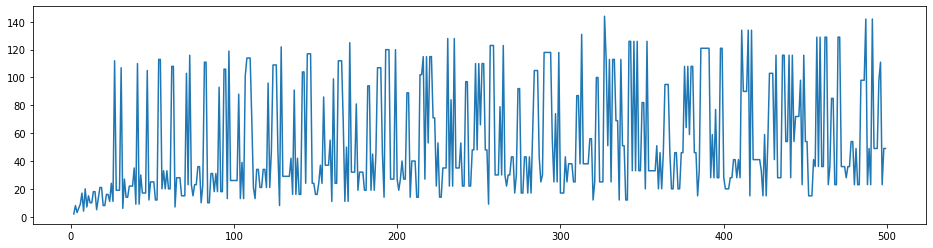

In [60]:
se = pd.Series([d[n] for n in range(2, 500)], index=range(2, 500))
se.plot(figsize=(16, 4))

### Number Spiral Diagonals (Problem 28)

Starting with the number and moving to the right in a clockwise direction a 5-by-5 spiral is formed as follows:

```
21 22 23 24 25
20  7  8  9 10
19  6  1  2 11
18  5  4  3 12
17 16 15 14 13
```

It can be verified that the sum of the numbers on the diagonals is 101.

What is the sum of the numbers on the diagonals in a 1001-by-1001 spiral formed in the same way?

In [62]:
import numpy as np

n = 5
a = np.zeros((n,n), dtype='int64')
a

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [63]:
i,j = n//2, n//2
cnt = 1

In [79]:
%%time

l_n = 1001*1001

corner = range(1,l_n+1,2)

i = 0

x = 1


solution = 1



while corner[i] != l_n:
	for j in range(4):
		i+= x
		solution += corner[i]
	x += 1


print (solution)

669171001
CPU times: user 922 µs, sys: 4 µs, total: 926 µs
Wall time: 933 µs


In [85]:
%%time
# Second solution, without generating the matrix.
# n = 5
# 1 (+3+5+7+9) (+13+17+21+25) ...

n = 1001

seq = [1]
for i in range(n // 2):
    step = 2 * (i + 1)
    for _ in range(4):
        seq.append(seq[-1] + step)
    
sum(seq)

CPU times: user 607 µs, sys: 0 ns, total: 607 µs
Wall time: 621 µs


669171001

In [82]:
%%time
# teacher Solution 
# First solution:

n = 1001

# generate all-zeros matrix
a = np.zeros((n, n), dtype='int64')

i, j = n // 2, n // 2                    # starting location
delta = (0, 1), (1, 0), (0, -1), (-1, 0) # step vectors: right, down, left, up
didx = 0                                 # direction index

# generate step sizes
step_sizes = []
for s in range(1, n + 1): step_sizes.extend([s, s])

# traverse the spiral
cnt = 1
for s in step_sizes[:-1]:
    di, dj = delta[didx]
    for k in range(s):
        a[i, j] = cnt
        cnt += 1
        i += di
        j += dj
        
    didx = (didx + 1) % 4 # change direction

np.diag(a).sum() + np.diag(np.fliplr(a)).sum() - 1

CPU times: user 492 ms, sys: 17 µs, total: 492 ms
Wall time: 490 ms


669171001

In [83]:
a

array([[1001001, 1001002, 1001003, ..., 1001999, 1002000, 1002001],
       [1001000,  997003,  997004, ...,  998000,  998001,  998002],
       [1000999,  997002,  993013, ...,  994009,  994010,  998003],
       ...,
       [1000003,  996006,  992017, ...,  991021,  995006,  998999],
       [1000002,  996005,  996004, ...,  995008,  995007,  999000],
       [1000001, 1000000,  999999, ...,  999003,  999002,  999001]])

### Sum Square Difference (Problem 6)


The sum of the squares of the first ten natural numbers is $1^2 + 2^2 + \dots + 10^2 = 385$

The square of the sum of the first ten natural numbers is $(1 + 2 + \dots + 10)^2 = 3025$

Hence the difference between the sum of the squares of the first ten natural numbers and the square of the sum is
$3025 - 385 = 2640$.

Find the difference between the sum of the squares of the first one hundred natural numbers and the square of the sum.

In [93]:
n = 100
s = 0
ss = 0
for i in range(0,n+1):
        s += i
        ss += i**2

(s**2) - ss 

25164150

In [94]:
# Teacher solution.
n = 100
sum(range(1, n + 1))**2 - sum(i**2 for i in range(1, n + 1))

25164150

In [95]:
# Second solution.

n = 100_000_000

sq_of_sums = (n * (n + 1) // 2)**2
sum_of_sqs = n * (n + 1) * (2 * n + 1) // 6
sq_of_sums - sum_of_sqs

25000000166666664166666650000000

## Decorators

- A decorator is a function that creates a function from a function.
- A decorator can be applied on a function definition using the @ operator.

In [1]:
# Parametric version of the "hello" decorator.
def hello(n):
    def dec(g):
        def g2(x):
            print('hello' * n)
            return g(x)
        return g2
    return dec

In [2]:
@hello(2)
def f4(x):
    return 2 * x

In [3]:
f4(20)

hellohello


40

Web frameworks often use decorators to make web endpoints from functions.
- https://bottlepy.org/docs/dev/
- https://flask.palletsprojects.com/en/2.2.x/quickstart/#a-minimal-application

In [4]:
# LRU (Least Recently Used) cache
import functools
@functools.lru_cache
def compute_xy(a):
    time.sleep(2)
    return a**2

In [7]:
import time

def compute_xy(a):
    time.sleep(2)
    return a**2

In [8]:
compute_xy(10)

100

In [9]:
%%time
compute_xy(10)

CPU times: user 1.13 ms, sys: 170 µs, total: 1.3 ms
Wall time: 2 s


100

In [9]:
def cache(f):
    def g(x):
        if x in g.results:
            return g.results[x]
        else:
            g.results[x] = f(x)
            return g.results[x]
            
    g.results = {}
    return g

In [18]:
@cache
def compute_xy(a):
    time.sleep(2)
    return a**2

In [19]:
%%time
compute_xy(20)

CPU times: user 1.28 ms, sys: 149 µs, total: 1.43 ms
Wall time: 2 s


400

In [20]:
%%time
compute_xy(20)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 12.2 µs


400

## Decorator Generator

"A decorator generator is a function that creates a function that creates a function from a function."

In [13]:
# Parametric version of the "hello" decorator.
def hello(n):
    def dec(g):
        def g2(x):
            print('hello'*n)
            return g(x)
        return g2
    return dec


In [14]:
@hello(2)
def f4(x):
    return 2*x

In [15]:
f4(20)

hellohello


40

In [17]:
# LRU (least Resulte Used) cache
import functools
@functools.lru_cache
def compute_xy(a):
    time.sleep(2)
    return a**2

In [21]:
%%time
compute_xy(10)

CPU times: user 1.24 ms, sys: 142 µs, total: 1.38 ms
Wall time: 2 s


100

In [22]:
%%time
compute_xy(10)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 12.6 µs


100

Web frameworks often use decorators to make web endpoints from functions.
- https://bottlepy.org/docs/dev/
- https://flask.palletsprojects.com/en/2.2.x/quickstart/#a-minimal-application

In [25]:
# clssmethod decorator

class Foo:
    def bar(self, x):
        return 2*x
    
    @classmethod
    def asdf(cls, x):
        return 3*x


In [26]:
f1 = Foo()
f2 = Foo()

In [30]:
print(
    f1.bar(10),
    f2.bar(11),
    Foo.asdf(12)
)

20 22 36


In [29]:
# Example for a class method in Pandas
import pandas as pd
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


### Largest Product in a Series (Problem 8)

The four adjacent digits in the 1000-digit number that have the greatest product are 9×9×8×9 = 5832.

```
73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450
```

Find the thirteen adjacent digits in the 1000-digit number that have the greatest product. What is the value of this product?

In [8]:
se = '7316717653133062491922511967442657474235534919493496983520312774506326239578318016984801869478851843858615607891129494954595017379583319528532088055111254069874715852386305071569329096329522744304355766896648950445244523161731856403098711121722383113622298934233803081353362766142828064444866452387493035890729629049156044077239071381051585930796086670172427121883998797908792274921901699720888093776657273330010533678812202354218097512545405947522435258490771167055601360483958644670632441572215539753697817977846174064955149290862569321978468622482839722413756570560574902614079729686524145351004748216637048440319989000889524345065854122758866688116427171479924442928230863465674813919123162824586178664583591245665294765456828489128831426076900422421902267105562632111110937054421750694165896040807198403850962455444362981230987879927244284909188845801561660979191338754992005240636899125607176060588611646710940507754100225698315520005593572972571636269561882670428252483600823257530420752963450'

In [10]:
pro = 1
st = ''
max_n = 0
max_s = ''
for i in range(0,len(se)-12):
    for q in range(0,13):
        pro *= int(se[i+q])
        st += se[i+q]
    if pro>max_n:
        max_n = pro
        max_s = st
    pro = 1
    st = ''
print(f'the Max adjacent is {max_s}, and it equales to {max_n}')

the Max adjacent is 5576689664895, and it equales to 23514624000


### Quadratic Primes (Problem 27)

Euler discovered the remarkable quadratic formula: $n^2 + n + 41$. It turns out that the formula will produce 40 primes for the consecutive integer values $0 \leq n \leq 39$.
Let us consider quadratics of the form $n^2 + an + b$ where $|a| < 1000$ and $|b| \leq 1000$! Find the product of the coefficients $a \cdot b$, for the quadratic expression that produces the maximum number of primes for consecutive values of $n$, starting with $n=0$.

In [25]:
# is_prime function:
def is_prime(n):
    if n<= 1: return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return n > 1

# num _primes_gen finction
def num_primes_gen(a,b):
    n = b
    i = 1
    c = 0
    while is_prime(n):
        c += 1
        n = i**2 + a*i + b
        i += 1
    return c

In [26]:
boun = 1000
max_gen = 0
for a in range(-boun+1, boun):
    for b in range (-boun, boun+1):
        p = num_primes_gen(a,b)
        if p>max_gen:
            max_gen = p
            r1 = a
            r2 = b


In [27]:
r1,r2,max_gen,r1*r2

(-61, 971, 71, -59231)

In [1]:
# generate the set of English lowercase letters
import string
set(string.ascii_lowercase)

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [2]:
# What will be the date 100 days from today?
import datetime
datetime.date.today() + datetime.timedelta(100)

datetime.date(2024, 2, 28)

In [3]:
# What is the 10th decimal digit of pi?
import math
str(math.pi)[2:][10]

'8'